# Nanonis Metadata and Data Read

In [1]:
# Read Nanonis metadata dictionary #CAP 23.03.11

import os
import re
import itertools

######################

folder_path = "."  
file_ext = ".sxm" 
metadata_lines = 97 #need better metadata EOF

######################

def Convert(a): # change list to dictionary, keys and values not yet debugged
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct
                
a=[]
for file_name in os.listdir(folder_path):
    try: 
        if file_name.endswith(file_ext):
                #with open(os.path.join(folder_path, file_name), "r", errors="ignore") as f:
            with open(os.path.join(folder_path, file_name), "r", errors="ignore") as f:
                a = re.split('\n:|:\n', f.read())[:metadata_lines]
    except:
        print('An error occured or there is no file in the current directory with the extesion',file_ext)
        
#print(file_name)
print("*Keys*")
print((Convert(a)).keys())
print("*Values*")
print((Convert(a)).values())



*Keys*
dict_keys([':NANONIS_VERSION', 'SCANIT_TYPE', 'REC_DATE', 'REC_TIME', 'REC_TEMP', 'ACQ_TIME', 'SCAN_PIXELS', 'SCAN_FILE', 'SCAN_TIME', 'SCAN_RANGE', 'SCAN_OFFSET', 'SCAN_ANGLE', 'SCAN_DIR', 'BIAS', 'Z-CONTROLLER', 'COMMENT', 'NanonisMain>Session Path', 'NanonisMain>SW Version', 'NanonisMain>UI Release', 'NanonisMain>RT Release', 'NanonisMain>RT Frequency (Hz)', 'NanonisMain>Signals Oversampling', 'NanonisMain>Acquisition Period (s)', 'NanonisMain>Animations Period (s)', 'NanonisMain>Indicators Period (s)', 'NanonisMain>Measurements Period (s)', 'Bias>Bias (V)', 'Bias>Calibration (V/V)', 'Bias>Offset (V)', 'Current>Current (A)', 'Current>Calibration (A/V)', 'Current>Offset (A)', 'Current>Gain', 'Z-Controller>Z (m)', 'Z-Controller>Controller name', 'Z-Controller>Controller status', 'Z-Controller>Setpoint', 'Z-Controller>Setpoint unit', 'Z-Controller>P gain', 'Z-Controller>I gain', 'Z-Controller>Time const (s)', 'Z-Controller>TipLift (m)', 'Z-Controller>Switch off delay (s)', 'Piez

In [2]:
Convert(a)

{':NANONIS_VERSION': '2',
 'SCANIT_TYPE': '              FLOAT            MSBFIRST',
 'REC_DATE': ' 18.03.2023',
 'REC_TIME': '20:26:34',
 'REC_TEMP': '      290.0000000000',
 'ACQ_TIME': '       498.2',
 'SCAN_PIXELS': '       512       512',
 'SCAN_FILE': 'C:\\Users\\SPM-PEEM\\Desktop\\DATA_Nanonis\\20220711_CreaTec_Service_Benchmarks_LHe\\Nanonis-Session-PMD100-HVHU_CreaTec_Service_PalmaLabBerlin220711\\TiSe2_2303a_annealing_300C_5min_evaporate_Pyrene_1_0070.sxm',
 'SCAN_TIME': '             4.864E-1             4.864E-1',
 'SCAN_RANGE': '           5.000000E-9           5.000000E-9',
 'SCAN_OFFSET': '             -2.354637E-7         1.267476E-7',
 'SCAN_ANGLE': '            0.000E+0',
 'SCAN_DIR': 'down',
 'BIAS': '            5.000E-1',
 'Z-CONTROLLER': '\tName\ton\tSetpoint\tP-gain\tI-gain\tT-const\n\tlog Current\t1\t1.000E-10 A\t2.000E-12 m\t2.497E-8 m/s\t8.010E-5 s',
 'COMMENT': 'A new TiSe2, annealed at 300 C for 5 min, then cool down to RT, evaporate the Pyrene on RT, 2.2 E 

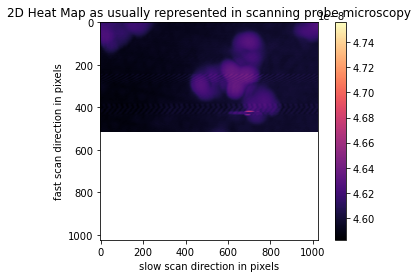

In [3]:
import nanonispy as nap #CAP 23.03.11
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

scan = nap.read.Scan('test.sxm')


#dictionary of signals 
scan.signals

#only one channel

data=scan.signals['Z']['forward']
np.shape(data) # number of pixels in x and y

plt.imshow( data , cmap = 'magma' )
  
# Adding details to the plot
plt.title( "2D Heat Map as usually represented in scanning probe microscopy" )
plt.xlabel('slow scan direction in pixels')
plt.ylabel('fast scan direction in pixels')

# Adding a color bar to the plot
plt.colorbar()

# Displaying the plot
plt.show()




# Other methods parsing methods for Nanonis data format (not implemented)

In [ ]:
import pySPM
print(pySPM.__version__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import os
from IPython import display

filename = get_data("test.sxm")
S = pySPM.SXM(filename)
S.list_channels()
fig, ax = plt.subplots(1,2,figsize=(14,7))
S.get_channel('Z').show(ax=ax[0]);
p = S.get_channel('Current').show(ax=ax[1], cmap='viridis');

In [ ]:

import gwyfile
import scipy.ndimage.filters
# Load a Gwyddion file into memory

obj = gwyfile.load('./test.sxm')
#obj = gwyfile.load(f'{file_name}')

# Return a dictionary with the datafield titles as keys and the
# datafield objects as values.
channels = gwyfile.util.get_datafields(obj)

channels['Z (Forward)'].data # One data channel out of many available

channel = channels['Z (Forward)']
channel.xreal
# Datafield objects have a `data` property to access their
# two-dimensional data as numpy arrays.
data = channel.data

# Plot the data using matplotlib.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(data, interpolation='none', origin='upper',
        extent=(0, channel.xreal, 0, channel.yreal), cmap='hot')
plt.show()